# **Series** and `Datetime` Indexing ⌚

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### **Puzzle 1**
Create a `Series` from a list.

In [3]:
s = pd.Series([i for i in range(5)])

s

0    0
1    1
2    2
3    3
4    4
dtype: int64

### **Puzzle 2**
Create a `Series` with a **datetime** index.

In [4]:
s_dates = pd.Series(s.values, index=pd.date_range('20240101', periods=5))

s_dates

2024-01-01    0
2024-01-02    1
2024-01-03    2
2024-01-04    3
2024-01-05    4
Freq: D, dtype: int64

### Creating the initial DataFrame with a `datetime` column

In [5]:
data = {'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35],
        'Birthdate': ['1995-05-01', '1990-06-15', '1985-07-20']}
df = pd.DataFrame(data)

df

,Name,Age,Birthdate
0,Alice,25,1995-05-01
1,Bob,30,1990-06-15
2,Charlie,35,1985-07-20


### **Puzzle 3**
Convert a column to a `datetime` type.

In [6]:
df['Birthdate'] = pd.to_datetime(df['Birthdate'])

df

,Name,Age,Birthdate
0,Alice,25,1995-05-01
1,Bob,30,1990-06-15
2,Charlie,35,1985-07-20


### **Puzzle 4**
Set a `datetime` column as the index.

In [7]:
df = df.set_index('Birthdate')

df

,Name,Age
Birthdate,,
1995-05-01,Alice,25
1990-06-15,Bob,30
1985-07-20,Charlie,35


### **Puzzle 5**
**Resample** a time series to a different frequency.<br>
Here, we set the frequency such that the **dates** of the datapoints are set to the **start** of the month i.e. `MS`.

In [8]:
df_resampled = df.resample('MS').sum()

df_resampled

,Name,Age
Birthdate,,
1985-07-01,Charlie,35
1985-08-01,0,0
1985-09-01,0,0
1985-10-01,0,0
1985-11-01,0,0
...,...,...
1995-01-01,0,0
1995-02-01,0,0
1995-03-01,0,0


### **Puzzle 6**
Calculate the **difference** between consecutive rows in a **time series**.

In [9]:
df['Difference'] = df['Age'].diff()

df

,Name,Age,Difference
Birthdate,,,
1995-05-01,Alice,25,NaN
1990-06-15,Bob,30,5.0
1985-07-20,Charlie,35,5.0


### **Puzzle 7**
Find the **rolling sum** of a time series.

In [10]:
# df['Rolling_Sum'] = df['Age'].rolling(window=2).agg(lambda x: x.iloc[0] + x.iloc[1])
df['Rolling_Sum'] = df['Age'].rolling(window=2).sum()

df

,Name,Age,Difference,Rolling_Sum
Birthdate,,,,
1995-05-01,Alice,25,NaN,NaN
1990-06-15,Bob,30,5.0,55.0
1985-07-20,Charlie,35,5.0,65.0


### **Puzzle 8**
**Group** a time series by **month** and calculate the **mean**.

In [11]:
df_grouped = df.groupby(df.index.month)['Age'].mean()  # type: ignore

df_grouped

Birthdate
5    25.0
6    30.0
7    35.0
Name: Age, dtype: float64

### **Puzzle 9**
Create a time series **plot**.

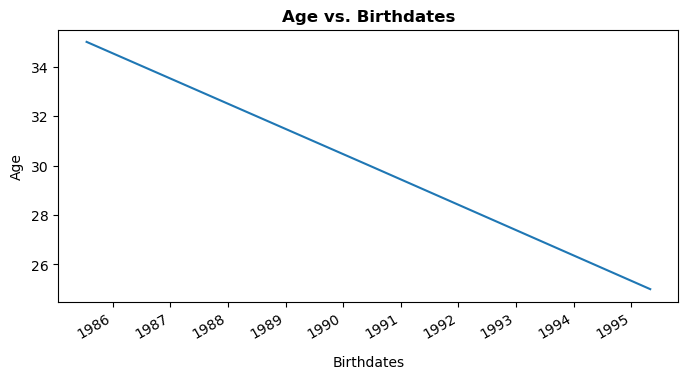

In [15]:
plt.figure(figsize=(8, 4))
df['Age'].plot()

plt.title("Age vs. Birthdates", fontweight='bold')
plt.xlabel("Birthdates", labelpad=10)
plt.ylabel("Age", labelpad=5)

plt.show()

In [13]:
# Feel free to code ...
